### This is the jupyter notebook I'll be using to do my first capstone project.

First step is to read in the data and clean it up.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [82]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [83]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [84]:
wine.country.value_counts(dropna=False)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
NaN                          63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine 

In [85]:
# Create a winery to country map to missing misisng country values 
# in DataFrame
country_to_continent_map = {}
for i in zip(wine.country, wine.winery):
    if i[1] not in country_to_continent_map and pd.notnull(i[0]):
        country_to_continent_map[i[1]] = i[0]
country_to_continent_map

wine['country'] = wine.winery.map(country_to_continent_map)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129940 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [86]:
# Looks like we still have values missing from the country column.
# Let's take a closer look to find out why.
wine[pd.isnull(wine.country)]['winery'].value_counts()

Orbelus                            7
Stone Castle                       4
Ross-idi                           4
Tsililis                           3
El Capricho                        3
St. Donat                          3
Les Frères Dutruy                  2
Somlói Vándor                      1
Kakhetia Traditional Winemaking    1
Lismore                            1
Büyülübağ                          1
Amiran Vepkhvadze                  1
Name: winery, dtype: int64

In [87]:
# Split countries into Continents
north_america = ['US', 'Canada', 'Mexico']
south_america = ['Chile', 'Argentina', 'Uruguay', 'Brazil', 'Peru']
europe = ['France', 'Italy', 'Spain', 'Portugal', 'Austria', 'Germany',\
          'Greece','Hungary', 'Bulgaria', 'Romania', 'Turkey','Slovenia', \
          'Georgia', 'England', 'Croatia', 'Moldova', 'Ukraine', 'Macedonia', 'Serbia', \
         'Czech Republic', 'Cyprus', 'India', 'Switzerland', 'Luxembourg',\
         'Bosnia and Herzegovina', 'Armenia', 'Slovakia']
africa = ['South Africa', 'Morocco', 'Egypt', 'Kosovo']
asia = ['Israel', 'Lebanon', 'China']
oceania = ['Australia', 'New Zealand']

# Add a continent columns to the dataset
country_to_continent_map = {}
for i in wine.country:
    if i in north_america:
        country_to_continent_map[i] = 'North America'
    elif i in south_america:
        country_to_continent_map[i] = 'South America'
    elif i in europe:
        country_to_continent_map[i] = 'Europe'
    elif i in africa:
        country_to_continent_map[i] = 'Africa'
    elif i in asia:
        country_to_continent_map[i] = 'Asia'
    elif i in oceania:
        country_to_continent_map[i] = 'Oceania'
    else:
        country_to_continent_map[i] = 'No Country'

wine['continent'] = wine.country.map(country_to_continent_map)

# Drop the wineries that do not have an associated country with it.

wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 14 columns):
country                  129940 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
continent                129971 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 14.9+ MB


In [88]:
wine = wine.drop_duplicates() # Drop duplicate rows
wine = wine[pd.notnull(wine.country)] # Drop rows with missing country information
wine = wine[pd.notnull(wine.price)] # Drop rows with missing price information
wine.info() # check the dataset again 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111563 entries, 1 to 129970
Data columns (total 14 columns):
country                  111563 non-null object
description              111563 non-null object
designation              79508 non-null object
points                   111563 non-null int64
price                    111563 non-null float64
province                 111538 non-null object
region_1                 93580 non-null object
region_2                 46568 non-null object
taster_name              88290 non-null object
taster_twitter_handle    83807 non-null object
title                    111563 non-null object
variety                  111562 non-null object
winery                   111563 non-null object
continent                111563 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 12.8+ MB


### Data Storytelling

In this step, I'm gathering visual insights from the data to help with the story I'm telling around this dataset.

Get going by asking the following questions and looking for the answers with some code and plots:
    * Can you count something interesting?
    * Can you find some trends (high, low, increase, decrease, anomalies)?
    * Can you make a bar plot or a histogram?
    * Can you compare two related quantities?
    * Can you make a scatterplot?
    * Can you make a time-series plot?

Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

**The purpose of this project is to inform everyday customer who are purchasing wine to get the best wine for their money. To do this, I am going to split the dataframe into the following:**

* Wines that retail for $100 or less.
* Add a column which splits the wines into Red or White.
* Analize a subset of the 6 most common wine varietals for each color.

In [89]:
# Create subset of dataframe based for wines that are less than $100
wine_low = wine[wine.price <= 100]

print('Number of entries in the original dataframe:',len(wine))
print('Number of entries in the subset dataframe:', len(wine_low))
print('The dataframe only lost',round((len(wine)-len(wine_low))/len(wine)*100,2), 'percent of it\'s data')

Number of entries in the original dataframe: 111563
Number of entries in the subset dataframe: 108334
The dataframe only lost 2.89 percent of it's data


In [90]:
# Top 6 most common grapes of each color
red = ['Pinot Noir', 'Cabernet Sauvignon', 'Syrah', 'Merlot', 'Zinfandel', 'Malbec']
white = ['Chardonnay', 'Riesling', 'Sauvignon Blanc', 'Pinot Gris', 'Rosé','Pinot Grigio']

# Create a column named 'color' and add the color for the top wine varieties
variety_to_color_map = {}
for i in wine_low.variety:
    if i in red:
        variety_to_color_map[i] = 'Red'
    elif i in white:
        variety_to_color_map[i] = 'White'
    else:
        variety_to_color_map[i] = 'Filter out'
wine_low['color'] = wine_low.variety.map(variety_to_color_map)

# Drop the wines that are not in the top 6
wine_low = wine_low[wine_low.color != 'Filter out']

print('In analyzing the remaining wines, we still have', len(wine_low), 'to filter through.')

In analyzing the remaining wines, we still have 54934 to filter through.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
# Filter the wines into Reds and Whites subset
reds = wine_low[wine_low.color == 'Red']
whites = wine_low[wine_low.color == 'White']

In [201]:
# Summary data
reds_points_mean = np.mean(reds.points)
whites_points_mean = np.mean(whites.points)
reds_price_mean = np.mean(reds.price)
whites_price_mean = np.mean(whites.price)

print('Avg. price for reds under $100:', round(reds_price_mean, 2), 'Avg points:', round(reds_points_mean, 2))
print()
print('Avg. price for whites under $100:', round(whites_price_mean, 2), 'Avg points:', round(whites_points_mean, 2))

Avg. price for reds under $100: 37.34 Avg points: 88.6

Avg. price for whites under $100: 25.54 Avg points: 88.01


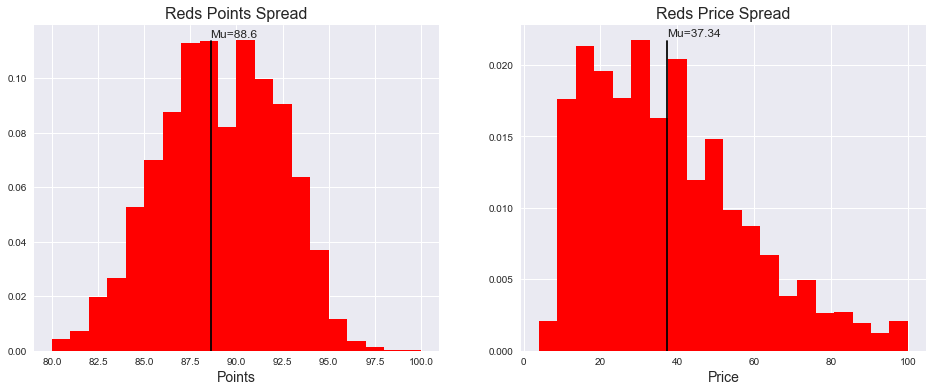

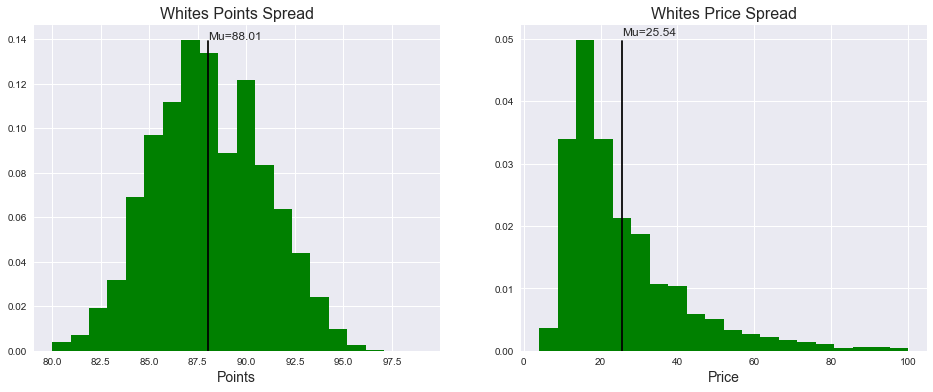

In [200]:
# Create histograms that include the the spread of price and points for white and red wines
fig = plt.figure(figsize=(16, 6))
sub1 = plt.subplot(1, 2, 1)
sub1 = plt.hist(reds.points, bins=20, normed=True, color='red')
sub1 = plt.axvline(reds_points_mean, ymax=0.95, color='black')
sub1 = plt.text(reds_points_mean, 0.115,'Mu=88.6')
sub1 = plt.xlabel('Points', size=14)
sub1 = plt.title('Reds Points Spread', size=16)

sub2 = plt.subplot(1, 2, 2)
sub2 = plt.hist(reds.price, bins=20, normed=True, color='red')
sub1 = plt.axvline(reds_price_mean, ymax=0.95, color='black')
sub1 = plt.text(reds_price_mean, 0.022,'Mu=37.34')
sub2 = plt.xlabel('Price', size=14)
sub2 = plt.title('Reds Price Spread', size=16)

plt.show()
plt.clf()

fig = plt.figure(figsize=(16, 6))
sub1 = plt.subplot(1, 2, 1)
sub1 = plt.hist(whites.points, bins=20, normed=True, color='green')
sub1 = plt.axvline(whites_points_mean, ymax=0.95, color='black')
sub1 = plt.text(whites_points_mean, 0.14,'Mu=88.01')
sub1 = plt.xlabel('Points', size=14)
sub1 = plt.title('Whites Points Spread', size=16)

sub2 = plt.subplot(1, 2, 2)
sub2 = plt.hist(whites.price, bins=20, normed=True, color='green')
sub1 = plt.axvline(whites_price_mean, ymax=0.95, color='black')
sub1 = plt.text(whites_price_mean, 0.0505,'Mu=25.54')
sub2 = plt.xlabel('Price', size=14)
sub2 = plt.title('Whites Price Spread', size=16)

plt.show()
plt.clf()

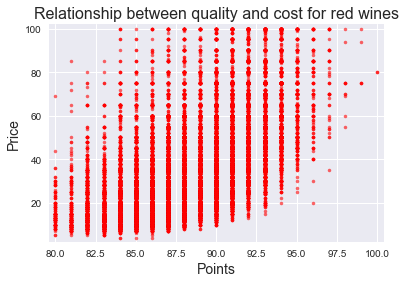

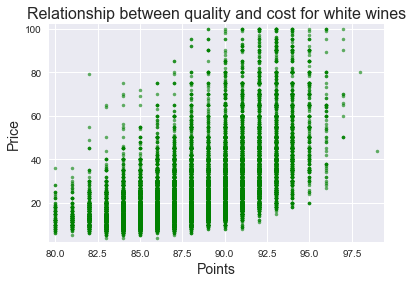

In [202]:
# Create a scatter plot of the red and white wines
_ = plt.plot(reds.points, reds.price, marker='.', linestyle='none', color='red', alpha=0.6)
_ = plt.xlabel('Points', size=14)
_ = plt.ylabel('Price', size=14)
_ = plt.title('Relationship between quality and cost for red wines', size=16)
plt.margins(0.02)

plt.show()
plt.clf()

# Same for white wines
_ = plt.plot(whites.points, whites.price, marker='.', linestyle='none', color='green', alpha=0.6)
_ = plt.xlabel('Points', size=14)
_ = plt.ylabel('Price', size=14)
_ = plt.title('Relationship between quality and cost for white wines', size=16)
plt.margins(0.02)

plt.show()
plt.clf()

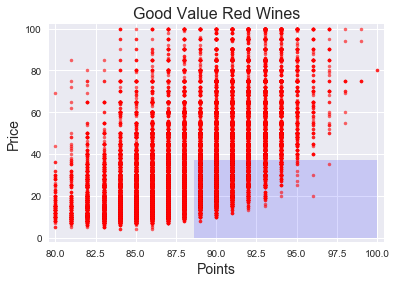

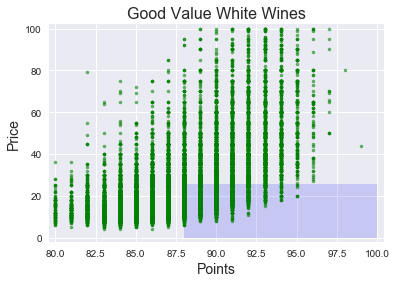

In [209]:
# The purpose of this exercise is to find "Good Value" wines. I'm defining "Good Value" by wines that are cheaper than average and 
# above average on quality (i.e. points)

# Create a scatter plot of the red and white wines
_ = plt.plot(reds.points, reds.price, marker='.', linestyle='none', color='red', alpha=0.6)
_ = plt.xlabel('Points', size=14)
_ = plt.ylabel('Price', size=14)
_ = plt.title('Good Value Red Wines', size=16)
_ = plt.fill_between([reds_points_mean, 100], 0, reds_price_mean, facecolor='blue', alpha=0.15)
plt.margins(0.02)

plt.show()
plt.clf()

# Same for white wines
_ = plt.plot(whites.points, whites.price, marker='.', linestyle='none', color='green', alpha=0.6)
_ = plt.xlabel('Points', size=14)
_ = plt.ylabel('Price', size=14)
_ = plt.title('Good Value White Wines', size=16)
_ = plt.fill_between([whites_points_mean, 100], 0, whites_price_mean, facecolor='blue', alpha=0.15)
plt.margins(0.02)

plt.show()
plt.clf()

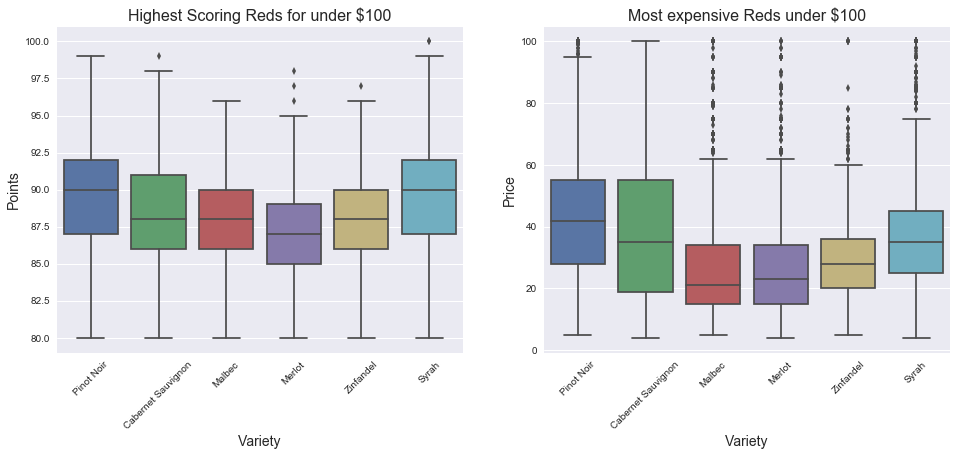

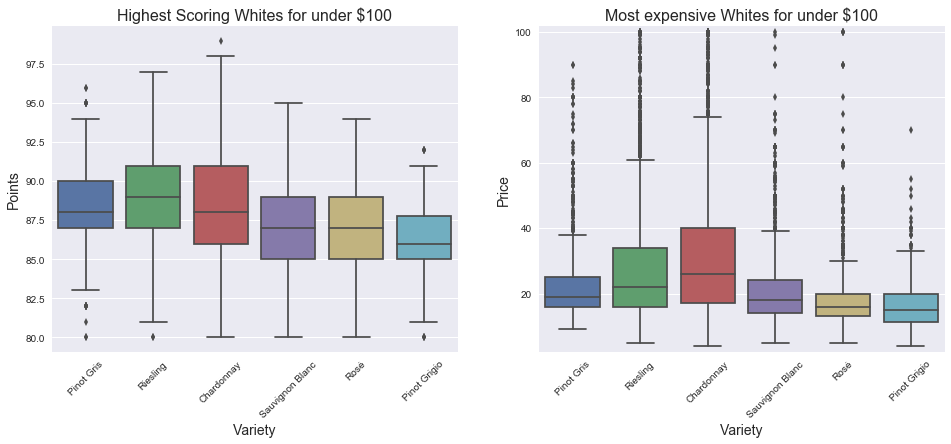

In [203]:

fig = plt.figure(figsize=(16, 6))
sub1 = plt.subplot(1, 2, 1)
sub1 = sns.boxplot(x='variety', y='points', data=reds)
sub1 = plt.xlabel('Variety', size=14)
sub1 = plt.xticks(rotation=45)
sub1 = plt.ylabel('Points', size=14)
sub1 = plt.title('Highest Scoring Reds for under $100', size=16)

sub2 = plt.subplot(1, 2, 2)
sub2 = sns.boxplot(x='variety', y='price', data=reds)
sub2 = plt.xlabel('Variety', size=14)
sub2 = plt.xticks(rotation=45)
sub2 = plt.ylabel('Price', size=14)
sub2 = plt.title('Most expensive Reds under $100', size=16)

plt.show()
plt.clf()

fig = plt.figure(figsize=(16, 6))
sub3 = plt.subplot(1, 2, 1)
sub3 = sns.boxplot(x='variety', y='points', data=whites)
sub3 = plt.xlabel('Variety', size=14)
sub3 = plt.xticks(rotation=45)
sub3 = plt.ylabel('Points', size=14)
sub3 = plt.title('Highest Scoring Whites for under $100', size=16)

sub4 = plt.subplot(1, 2, 2)
sub4 = sns.boxplot(x='variety', y='price', data=whites)
sub4 = plt.xlabel('Variety', size=14)
sub4 = plt.xticks(rotation=45)
sub4 = plt.ylabel('Price', size=14)
sub4 = plt.title('Most expensive Whites for under $100', size=16)

plt.margins(0.02)
plt.show()
plt.clf()

# Appendix

Here's some interesting information that won't necessarily make it on the project.

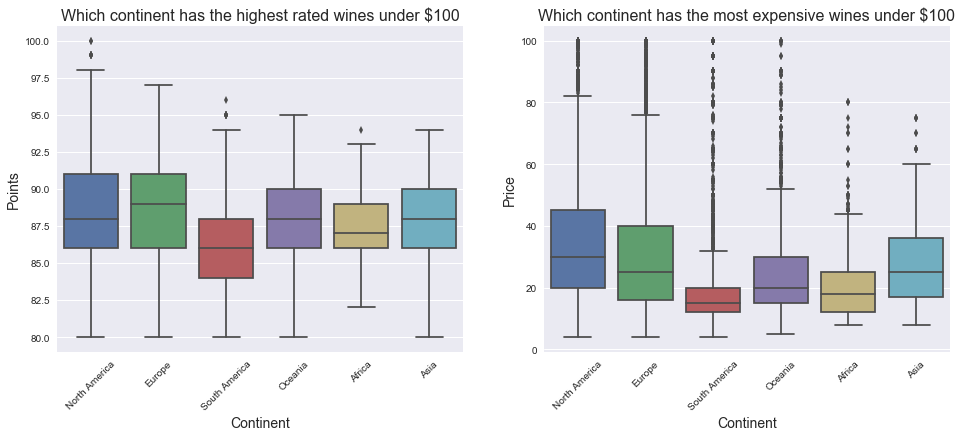

In [95]:
# Summary information based on continents
fig = plt.figure(figsize=(16, 6))
sub1 = plt.subplot(1, 2, 1)
sub1 = sns.boxplot(x='continent', y='points', data=wine_low)
sub1 = plt.xlabel('Continent', size=14)
sub1 = plt.xticks(rotation=45)
sub1 = plt.ylabel('Points', size=14)
sub1 = plt.title('Which continent has the highest rated wines under $100', size=16)

sub2 = plt.subplot(1, 2, 2)
sub2 = sns.boxplot(x='continent', y='price', data=wine_low)
sub2 = plt.xlabel('Continent', size=14)
sub2 = plt.xticks(rotation=45)
sub2 = plt.ylabel('Price', size=14)
sub2 = plt.title('Which continent has the most expensive wines under $100', size=16)
plt.show()

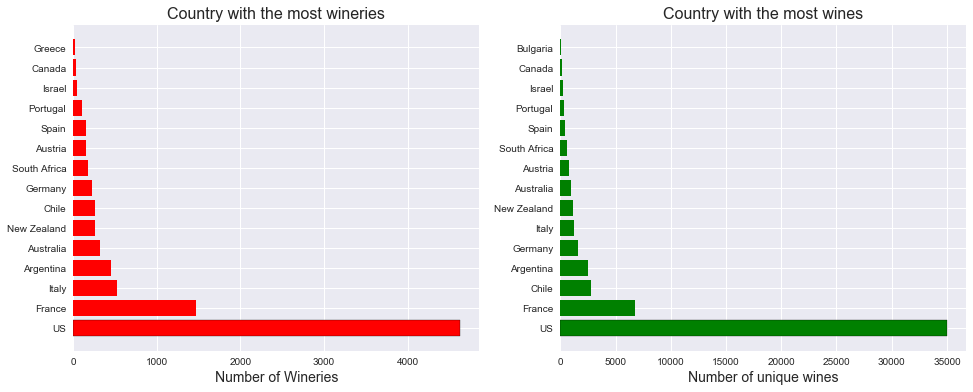

In [96]:
# Filter the top 15 countries by number of wines they have.
top15_countries = wine_low.groupby('country', as_index=False)['winery'].count()
top15_countries = top15_countries.sort_values('winery', ascending=False).head(15)

# Filter the top 15 countries with the greatest number of wineries
topwineries = wine_low.groupby('country', as_index=False).agg({'winery': pd.Series.nunique}).sort_values(by='winery', ascending=False)
topwineries = topwineries[:15]


# Create bar plot with countries with greatest number of wineries
fig = plt.figure(figsize=(16, 6))
sub1 = plt.subplot(1, 2, 1)

y_pos = np.arange(len(topwineries))
sub1 = plt.barh(y_pos, topwineries['winery'], align='center', color='red', edgecolor='black')
sub1 = plt.yticks(y_pos, topwineries['country'])
sub1 = plt.xlabel('Number of Wineries', size=14)
sub1 = plt.title('Country with the most wineries', size=16)

# Create bar plot with top wine producing countries
sub2 = plt.subplot(1, 2, 2)

y_pos = np.arange(len(top15_countries))
sub2 = plt.barh(y_pos, top15_countries['winery'], align='center', color='green', edgecolor='black')
sub2 = plt.yticks(y_pos, top15_countries['country'])
sub2 = plt.xlabel('Number of unique wines', size=14)
sub2 = plt.title('Country with the most wines', size=16)

plt.show()
plt.clf()